<a href="https://colab.research.google.com/github/Bbeeht/Classification/blob/main/Doan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/Khanhly239/SegAugmentBreastImg.git

Cloning into 'SegAugmentBreastImg'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 38 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 23.10 KiB | 11.55 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [6]:
%cd /content/SegAugmentBreastImg


/content/SegAugmentBreastImg


In [7]:
!ls /content/SegAugmentBreastImg


busbra_loader.py  main.py	  modelUPSKC4.py    skc2.py
busi_loader.py	  model6.py	  pix2pix_torch.py  skc3.py
configs.py	  model.py	  README.md	    skc4.py
eval.py		  modelUP.py	  removeASPP.py     trainer.py
get_models.py	  modelUPSKC1.py  score2.py
kvasir_loader.py  modelUPSKC2.py  showanh.py
LICENSE		  modelUPSKC3.py  skc1.py


In [8]:
!pip install torchinfo

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Baseline

In [6]:
!python3  main.py --model=1 --dataset_name='BUSI'

1
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: train - Loaded 517 image-mask pairs.
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: val - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
model.safetensors: 100% 21.4M/21.4M [00:00<00:00, 35.5MB/s]
Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_v

In [9]:
!python eval.py

Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: test - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.w

In [10]:
!python3  main.py --model=1 --dataset_name='BUSI'

1
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: train - Loaded 517 image-mask pairs.
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: val - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_hea

In [21]:
!python eval.py

Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: test - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.w

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


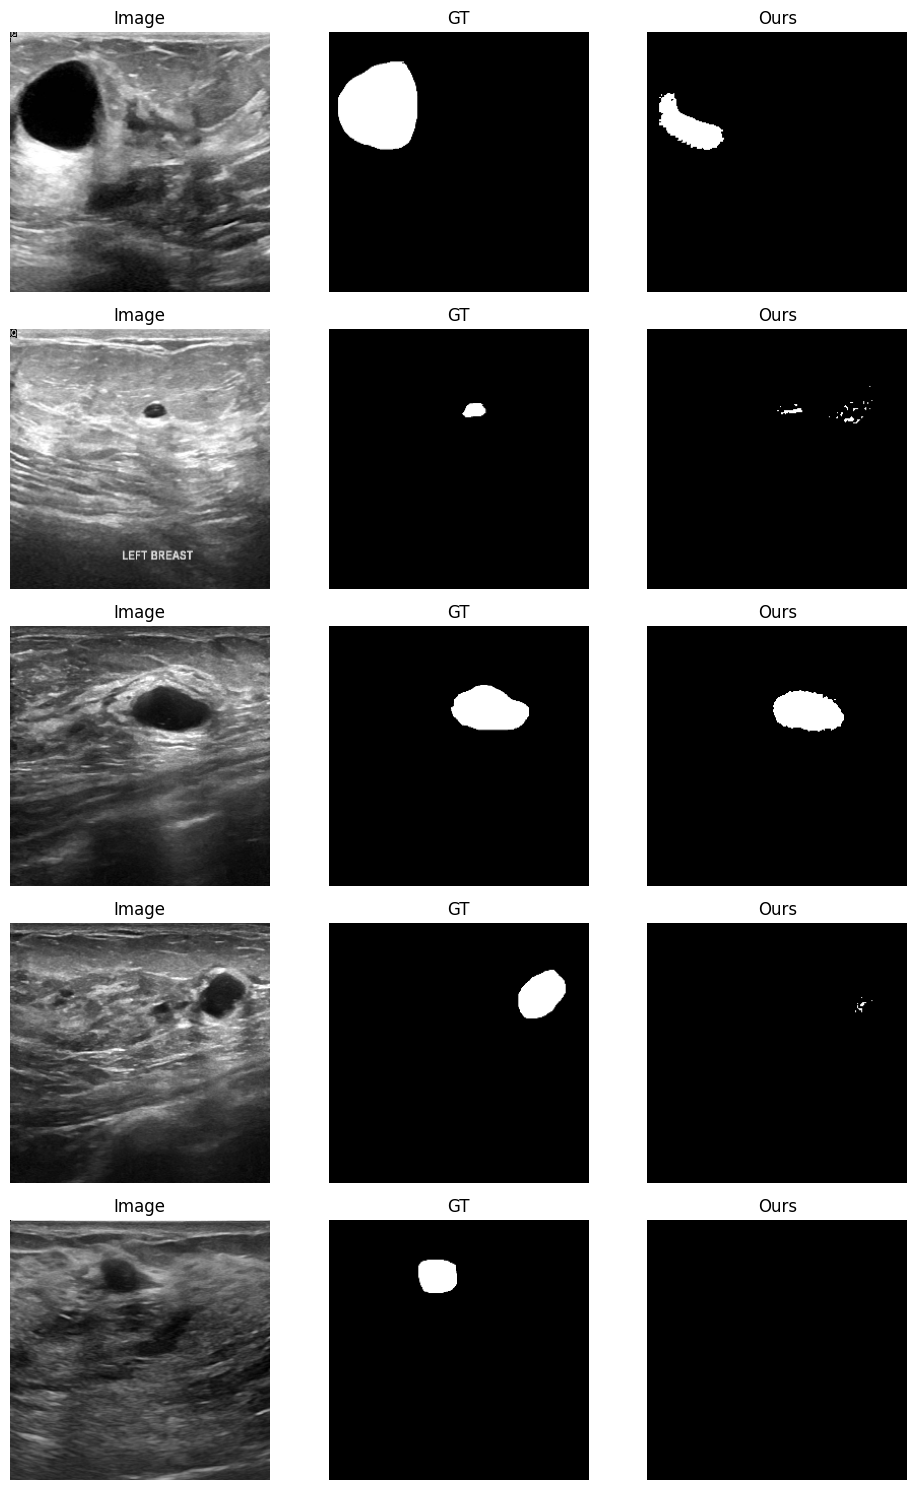

In [18]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

# === Load Model ===
from model import EfficientFeebackNetwork  # model.py phải chứa class này

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "/content/SegAugmentBreastImg/checkpoints/model_busi.pth"

# Kiểm tra file mô hình tồn tại
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Không tìm thấy model tại: {model_path}")

model = EfficientFeebackNetwork(num_class=2).to(device)
state_dict = torch.load(model_path, map_location=device)
model.load_state_dict(state_dict, strict=False)  # Bỏ qua warning nếu có
model.eval()

# === Preprocessing and Dataset ===
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

class BUSIDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.transform = transform
        self.img_paths = []
        self.mask_paths = []

        # Tìm các ảnh và mask trong thư mục con
        for subfolder in ['benign', 'malignant']:
            full_path = os.path.join(img_dir, subfolder)
            if not os.path.exists(full_path):
                continue
            for fname in os.listdir(full_path):
                if '_mask' not in fname and fname.endswith(".png"):
                    img_path = os.path.join(full_path, fname)
                    mask_path = os.path.join(full_path, fname.replace(".png", "_mask.png"))
                    if os.path.exists(mask_path):
                        self.img_paths.append(img_path)
                        self.mask_paths.append(mask_path)

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        mask_path = self.mask_paths[idx]

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        image_resized = cv2.resize(image, (256, 256))
        mask_resized = cv2.resize(mask, (256, 256))

        if self.transform:
            image_tensor = self.transform(image_resized)
        else:
            image_tensor = transforms.ToTensor()(image_resized)

        return image_resized, mask_resized, image_tensor

# === Visualization ===
def visualize_predictions(images, masks_gt, masks_pred, save_path=None):
    n = len(images)
    fig, axes = plt.subplots(n, 3, figsize=(10, n * 3))
    if n == 1:
        axes = np.expand_dims(axes, axis=0)

    for i in range(n):
        axes[i, 0].imshow(images[i])
        axes[i, 0].set_title("Image")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(masks_gt[i], cmap="gray")
        axes[i, 1].set_title("GT")
        axes[i, 1].axis("off")

        axes[i, 2].imshow(masks_pred[i], cmap="gray")
        axes[i, 2].set_title("Ours")
        axes[i, 2].axis("off")

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# === Run on Sample Images ===
img_root = "/content/drive/MyDrive/Data_BUSI/Dataset_BUSI_with_GT"  # ← sửa nếu cần

dataset = BUSIDataset(img_root, transform=transform_img)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

images_vis, gt_vis, pred_vis = [], [], []

with torch.no_grad():
    for idx, (img_np, mask_np, img_tensor) in enumerate(loader):
        if idx >= 5:  # Chỉ hiển thị 5 ảnh
            break
        img_tensor = img_tensor.to(device)
        output = model(img_tensor)
        pred_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy() * 255

        images_vis.append(img_np[0])
        gt_vis.append(mask_np[0])
        pred_vis.append(pred_mask.astype(np.uint8))

# === Show 3 cột kết quả ===
visualize_predictions(images_vis, gt_vis, pred_vis)


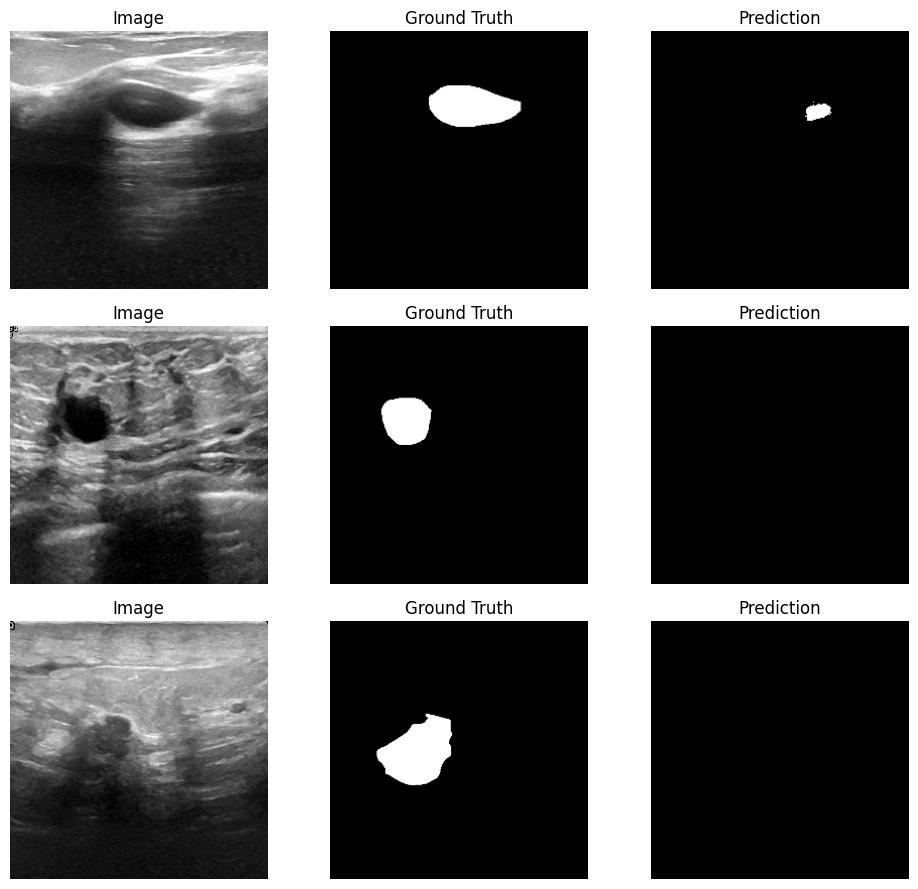

In [20]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

# === Load Model ===
from model import EfficientFeebackNetwork  # model.py phải chứa class này

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "/content/SegAugmentBreastImg/checkpoints/model_busi.pth"

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Không tìm thấy model tại: {model_path}")

model = EfficientFeebackNetwork(num_class=2).to(device)
state_dict = torch.load(model_path, map_location=device)
model.load_state_dict(state_dict, strict=False)  # Bỏ qua warning nếu thiếu vài key phụ
model.eval()

# === Preprocessing ===
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# === Dataset Class ===
class BUSIDataset(Dataset):
    def __init__(self, img_dir, target_files=None, transform=None):
        self.transform = transform
        self.img_paths = []
        self.mask_paths = []

        for subfolder in ['benign', 'malignant']:
            full_path = os.path.join(img_dir, subfolder)
            if not os.path.exists(full_path):
                continue
            for fname in os.listdir(full_path):
                if '_mask' not in fname and fname.endswith(".png"):
                    if target_files and fname not in target_files:
                        continue
                    img_path = os.path.join(full_path, fname)
                    mask_path = os.path.join(full_path, fname.replace(".png", "_mask.png"))
                    if os.path.exists(mask_path):
                        self.img_paths.append(img_path)
                        self.mask_paths.append(mask_path)

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        mask_path = self.mask_paths[idx]

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        image_resized = cv2.resize(image, (256, 256))
        mask_resized = cv2.resize(mask, (256, 256))

        if self.transform:
            image_tensor = self.transform(image_resized)
        else:
            image_tensor = transforms.ToTensor()(image_resized)

        return image_resized, mask_resized, image_tensor

# === Visualization Function ===
def visualize_predictions(images, masks_gt, masks_pred, save_path=None):
    n = len(images)
    fig, axes = plt.subplots(n, 3, figsize=(10, n * 3))
    if n == 1:
        axes = np.expand_dims(axes, axis=0)

    for i in range(n):
        axes[i, 0].imshow(images[i])
        axes[i, 0].set_title("Image")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(masks_gt[i], cmap="gray")
        axes[i, 1].set_title("Ground Truth")
        axes[i, 1].axis("off")

        axes[i, 2].imshow(masks_pred[i], cmap="gray")
        axes[i, 2].set_title("Prediction")
        axes[i, 2].axis("off")

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# === Run on Specific Images ===
img_root = "/content/drive/MyDrive/Data_BUSI/Dataset_BUSI_with_GT"  # sửa path nếu cần

# 👉 Danh sách tên ảnh muốn hiển thị
target_filenames = [
    "benign (20).png",
    "malignant (9).png",
    "benign (50).png"
]

dataset = BUSIDataset(img_root, target_files=target_filenames, transform=transform_img)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

images_vis, gt_vis, pred_vis = [], [], []

with torch.no_grad():
    for (img_np, mask_np, img_tensor) in loader:
        img_tensor = img_tensor.to(device)
        output = model(img_tensor)
        pred_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy() * 255

        images_vis.append(img_np[0])
        gt_vis.append(mask_np[0])
        pred_vis.append(pred_mask.astype(np.uint8))

# === Show Results ===
visualize_predictions(images_vis, gt_vis, pred_vis)


In [23]:
!python3  main.py --model=1 --dataset_name='BUSI'

1
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: train - Loaded 517 image-mask pairs.
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: val - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_hea

In [25]:
!python eval.py

Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: test - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.w

In [26]:
!python3  main.py --model=1 --dataset_name='BUSI'

1
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: train - Loaded 517 image-mask pairs.
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: val - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_hea

In [27]:
!python eval.py

Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: test - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.w

In [28]:
!python3  main.py --model=1 --dataset_name='BUSI'

1
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: train - Loaded 517 image-mask pairs.
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: val - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_hea

In [29]:
!python eval.py

Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: test - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.w

In [31]:
!python3  main.py --model=1 --dataset_name='BUSI'

1
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: train - Loaded 517 image-mask pairs.
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: val - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_hea

In [32]:
!python eval.py

Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: test - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.w

In [33]:
!python3  main.py --model=1 --dataset_name='BUSI'

1
/content/SegAugmentBreastImg/busi_loader.py:33: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=32, max_width=32, p=0.3)
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: train - Loaded 517 image-mask pairs.
[INFO] Found 647 valid image-mask pairs.
[INFO] Phase: val - Loaded 130 image-mask pairs.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_hea